In [38]:
%matplotlib inline 
from sklearn import cluster
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp
from IPython.display import HTML
from IPython.display import Image
from ipywidgets import interact, interactive, fixed,widgets
from IPython.display import display

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [3]:
%cd //mnt/bay1/bioinfo/qual-project/tcga

/mnt/bay1/bioinfo/qual-project/tcga


# Clustering attempt based on mRNA fold-changes of genes selected by previous methods

### Genes that contributed to 10k decision trees using spearman classification

Below are the genes with the highest average information content.  These were selected via their spearman correlation coefficient between a genes given mRNA fold change from cancer to healthy versus its protein fold change.

<img scr="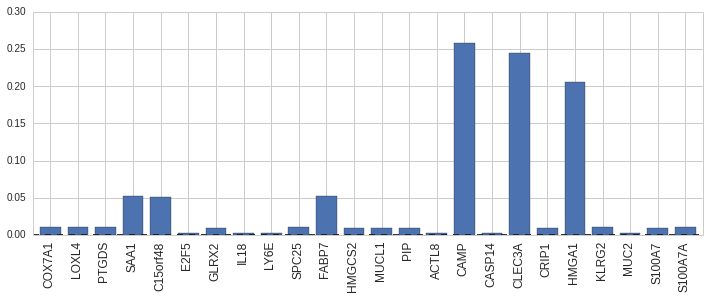">

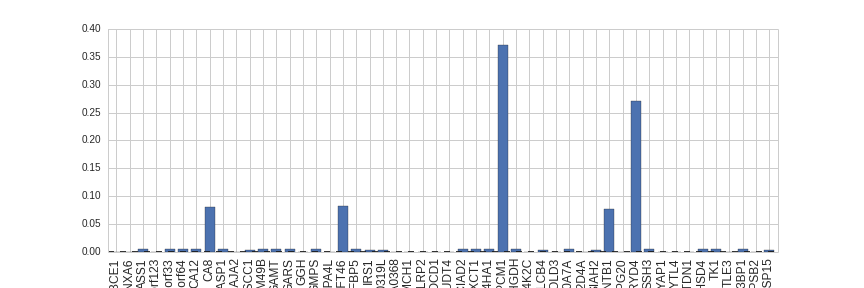

In [5]:
Image(filename='pearson_genes_info_content.png')

#### Clustering after PCA for 2 dimensions

#### Classifying cases
These dots represent the 16 patients that have both mRNA and protein data available and were the basis for the generation of the decision trees.  In this case this cluster was generated by looking at the genes prioritized by spearman correlation coefficient, and the 5 with most contributed information were chosen.

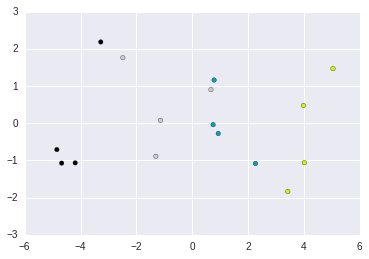

In [62]:
%run ./py/clustering.py most_info_new_ids.txt

#### All samples 3D - Most informative genes
The following is the same as above, only for all patients, for this instance I've included the contribution of each of the genes for the weighting of the principle components.

            PC-1      PC-2      PC-3
CA8    -0.997242  0.063851 -0.015080
IFT46  -0.010857 -0.409473  0.538519
PCM1   -0.032884 -0.223794  0.579726
SNTB1   0.053110  0.869789  0.469913
SPRYD4 -0.038583 -0.147099  0.390986

[5 rows x 3 columns]


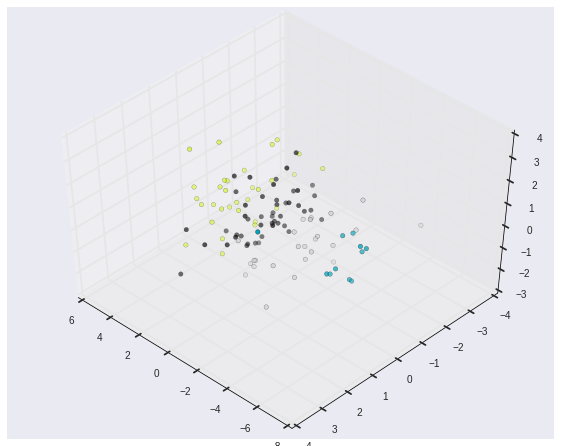

In [45]:
%run ./py/clustering_all_samples.py id_lists/most_info_new_ids.txt mrna_with_cluster_spearman.txt 3d

#### 3D PCA for all 50 genes
Same as above, but for all 50 genes

               PC-1      PC-2      PC-3
ABCE1      0.000764  0.090070 -0.031165
ANXA6      0.042489 -0.174857  0.031436
ASS1       0.284520  0.018267  0.207106
C1orf123   0.045724 -0.080692  0.027577
C4orf33   -0.048500 -0.023779  0.020379
C9orf64   -0.054355 -0.053813 -0.008190
CA12      -0.437300 -0.178533  0.267404
CA8       -0.138412  0.054654  0.025327
CASP1      0.038282  0.005606  0.129544
DNAJA2     0.008352  0.021527 -0.022675
DSCC1      0.065529  0.108781 -0.102647
FAM49B     0.036410  0.023386 -0.003746
GAMT      -0.129286 -0.198060  0.012024
GARS       0.037025  0.061678 -0.003535
GGH        0.100974  0.124509 -0.012108
GMPS       0.031240  0.090824 -0.005565
HSPA4L    -0.084884  0.267891 -0.102138
IFT46     -0.076189 -0.078272  0.039089
IGFBP5     0.008019 -0.219117  0.097802
IRS1      -0.152185 -0.042866 -0.030222
KIAA0319L -0.096018 -0.035403 -0.012205
KIAA0368   0.019717 -0.006156 -0.050219
LIMCH1     0.037198 -0.095774  0.102884
NLRP2     -0.486333  0.578346  0.189145


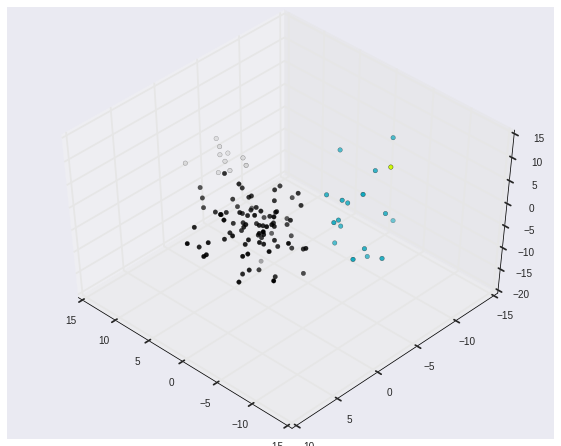

In [44]:
%run ./py/clustering_all_samples.py id_lists/gene_sets/genes_to_build.txt mrna_with_cluster_all_50_pca_3_spearman.txt 3d

#### All samples 2D - most informative genes
This is the same as the previous plots, but for two principle components instead of three.

            PC-1      PC-2
CA8    -0.997242  0.063851
IFT46  -0.010857 -0.409473
PCM1   -0.032884 -0.223794
SNTB1   0.053110  0.869789
SPRYD4 -0.038583 -0.147099

[5 rows x 2 columns]


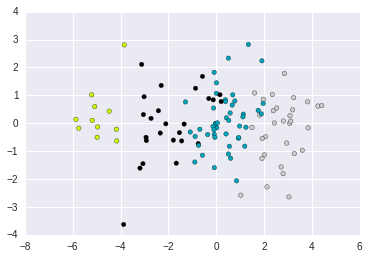

In [51]:
%run ./py/clustering_all_samples.py id_lists/most_info_new_ids.txt mrna_with_cluster_spearman.txt 2d

               PC-1      PC-2
ABCE1      0.000764  0.090070
ANXA6      0.042489 -0.174857
ASS1       0.284520  0.018267
C1orf123   0.045724 -0.080692
C4orf33   -0.048500 -0.023779
C9orf64   -0.054355 -0.053813
CA12      -0.437300 -0.178533
CA8       -0.138412  0.054654
CASP1      0.038282  0.005606
DNAJA2     0.008352  0.021527
DSCC1      0.065529  0.108781
FAM49B     0.036410  0.023386
GAMT      -0.129286 -0.198060
GARS       0.037025  0.061678
GGH        0.100974  0.124509
GMPS       0.031240  0.090824
HSPA4L    -0.084884  0.267891
IFT46     -0.076189 -0.078272
IGFBP5     0.008019 -0.219117
IRS1      -0.152185 -0.042866
KIAA0319L -0.096018 -0.035403
KIAA0368   0.019717 -0.006156
LIMCH1     0.037198 -0.095774
NLRP2     -0.486333  0.578346
NUDCD1     0.018861  0.091818
NUDT4     -0.022997 -0.080287
OCIAD2    -0.064324  0.070778
OXCT1      0.126932  0.035807
P4HA1     -0.002316  0.014545
PCM1      -0.073323 -0.053735
PHGDH      0.171397  0.153017
PIP4K2C   -0.089990  0.054499
PLCB4     

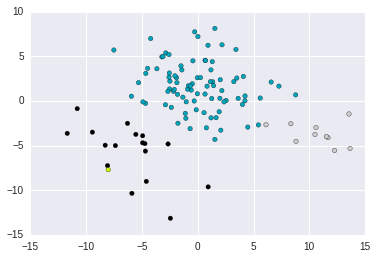

In [46]:
%run ./py/clustering_all_samples.py id_lists/gene_sets/genes_to_build.txt mrna_with_cluster_all_50_pca_2_spearman.txt 2d

#### Metadata and cluster information


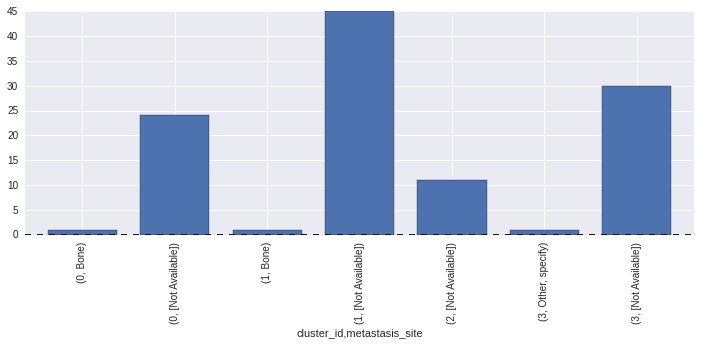

In [52]:
clustered_data = pd.read_csv(open("mrna_with_cluster_spearman.txt",'r'),delimiter="\t")
d = widgets.Select()
d.options = clustered_data.columns.tolist()

def plot_hist(filter_val):
    clustered_data.groupby(['cluster_id',filter_val]).size().plot(kind="bar",figsize=(12,4))
    
widgets.interactive(plot_hist,filter_val=d)

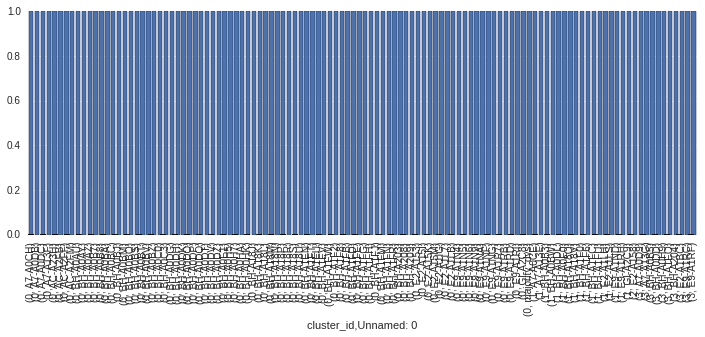

In [53]:
clustered_data = pd.read_csv(open("mrna_with_cluster_all_50_pca_3_spearman.txt",'r'),delimiter="\t")
d = widgets.Select()
d.options = clustered_data.columns.tolist()

def plot_hist(filter_val):
    clustered_data.groupby(['cluster_id',filter_val]).size().plot(kind="bar",figsize=(12,4))
    
widgets.interactive(plot_hist,filter_val=d)

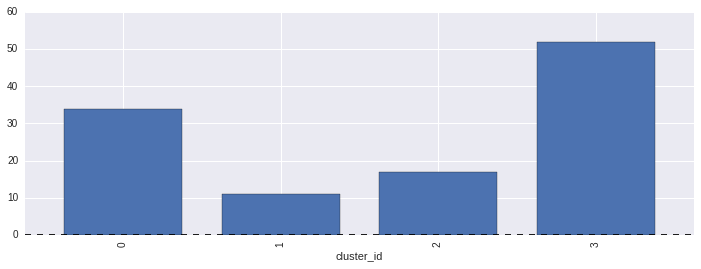

In [28]:
clustered_data.groupby(['cluster_id']).size().plot(kind="bar",figsize=(12,4))

### Genes that contributed to 10k decision trees using previous classification

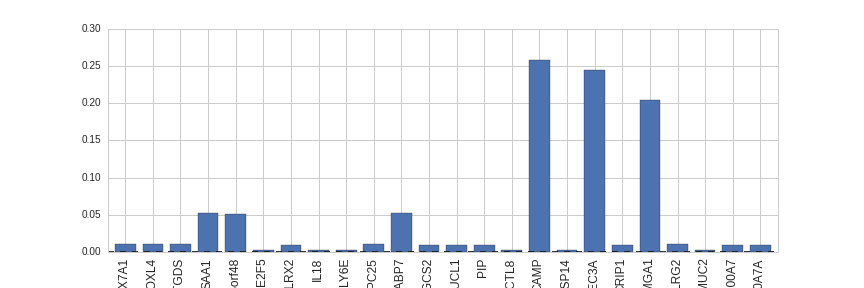

In [6]:
Image(filename='old_genes_info_content.png')

#### Clustering after PCA for 2 dimensions

#### Classifying cases

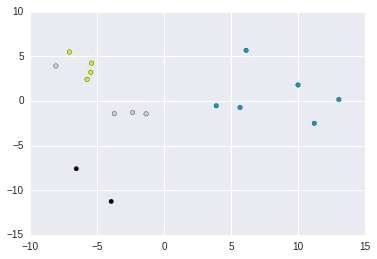

In [55]:
%run ./py/clustering.py most_info_old_data_ids.txt

#### All samples 3D - Most informative

          SAA1  C15orf48     FABP7      CAMP    CLEC3A     HMGA1
PC-1  0.040224 -0.096999  0.008346 -0.041597 -0.992933  0.035454
PC-2  0.350425  0.108883  0.927332  0.027686  0.012583  0.066908
PC-3 -0.905783  0.267350  0.303921 -0.011120 -0.055802  0.111689

[3 rows x 6 columns]


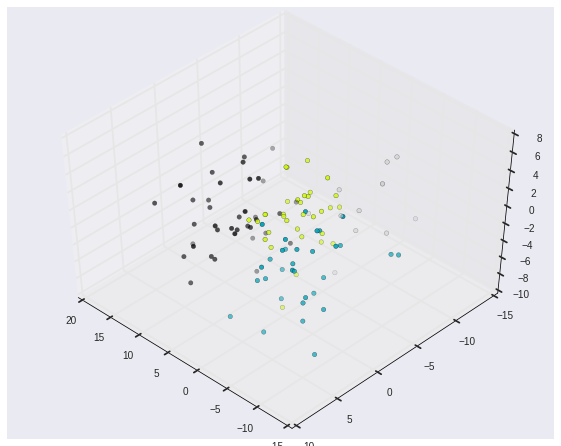

In [39]:
%run ./py/clustering_all_samples.py id_lists/most_info_old_data_ids.txt mrna_with_cluster_old.txt 3d

#### 3D PCA for all 50 genes selected by spearman corr.

#### All samples 2D - Most informative

          SAA1  C15orf48     FABP7      CAMP    CLEC3A     HMGA1
PC-1  0.040224 -0.096999  0.008346 -0.041597 -0.992933  0.035454
PC-2  0.350425  0.108883  0.927332  0.027686  0.012583  0.066908

[2 rows x 6 columns]


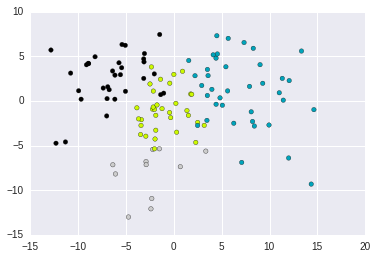

In [34]:
%run ./py/clustering_all_samples.py id_lists/most_info_old_data_ids.txt mrna_with_cluster_old.txt 2d

          SAA1  C15orf48     FABP7      CAMP    CLEC3A     HMGA1
PC-1  0.040224 -0.096999  0.008346 -0.041597 -0.992933  0.035454
PC-2  0.350425  0.108883  0.927332  0.027686  0.012583  0.066908

[2 rows x 6 columns]


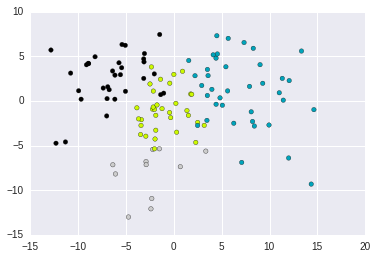

In [34]:
%run ./py/clustering_all_samples.py id_lists/ mrna_with_cluster_old.txt 2d

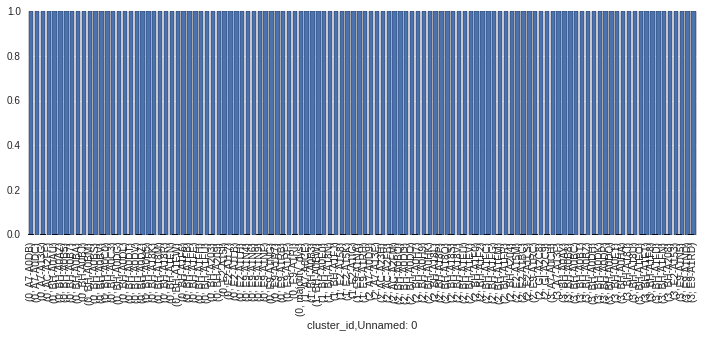

In [12]:
clustered_data2 = pd.read_csv(open("mrna_with_cluster_old.txt",'r'),delimiter="\t")
d2 = widgets.Select()
d2.options = clustered_data2.columns.tolist()

def plot_hist(filter_val):
    clustered_data2.groupby(['cluster_id',filter_val]).size().plot(kind="bar",figsize=(12,4))
    
widgets.interactive(plot_hist,filter_val=d2)